In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
file_path = "dataset_kotor.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   id                                                                  211833 non-null  int64  
 1   Age (y)                                                             211833 non-null  int64  
 2   Gender(1, male; 2, female)                                          211833 non-null  int64  
 3   site                                                                211833 non-null  int64  
 4   height(cm)                                                          211831 non-null  float64
 5   weight(kg)                                                          211833 non-null  float64
 6   BMI(kg/m2)                                                          211833 non-null  float64
 7   SB

In [3]:
df_cleaned = df.drop(
    columns=[
        "id",
        "site",
        "height(cm)",
        "weight(kg)",
        "year of followup",
        "censor of diabetes at followup(1, Yes; 0, No)",
    ]
)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 19 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Age (y)                                                             211833 non-null  int64  
 1   Gender(1, male; 2, female)                                          211833 non-null  int64  
 2   BMI(kg/m2)                                                          211833 non-null  float64
 3   SBP(mmHg)                                                           211810 non-null  float64
 4   DBP(mmHg)                                                           211809 non-null  float64
 5   FPG (mmol/L)                                                        211833 non-null  float64
 6   Cholesterol(mmol/L)                                                 206979 non-null  float64
 7   Tr

In [4]:
new_column_names = {
    "Age (y)": "Age",
    "Gender(1, male; 2, female)": "Gender",
    "BMI(kg/m2)": "BMI",
    "SBP(mmHg)": "SBP",
    "DBP(mmHg)": "DBP",
    "FPG (mmol/L)": "FPG",
    "Cholesterol(mmol/L)": "Chol",
    "Triglyceride(mmol/L)": "Tri",
    "HDL-c(mmol/L)": "HDL",
    "LDL(mmol/L)": "LDL",
    "ALT(U/L)": "ALT",
    "AST(U/L)": "AST", 
    "BUN(mmol/L)": "BUN",
    "CCR(umol/L)": "CCR",
    "FPG of final visit(mmol/L)": "FFPG",
    "Diabetes diagnosed during followup（1,Yes）": "Diabetes",
    "smoking status(1,current smoker;2, ever smoker;3,never smoker)": "smoking",
    "drinking status(1,current drinker;2, ever drinker;3,never drinker)": "drinking",
    "family histroy of diabetes(1,Yes;0,No)": "family_history",
}

df_cleaned.rename(columns=new_column_names, inplace=True)

new_order = [
    "Age", "Gender", "BMI", "SBP", "DBP", "FPG", "Chol", "Tri", "HDL", "LDL",
    "ALT", "AST", "BUN", "CCR", "FFPG", "smoking", "drinking", "family_history", "Diabetes"
]

df_cleaned = df_cleaned[new_order]

print(df_cleaned.head())

   Age  Gender   BMI    SBP   DBP   FPG  Chol   Tri   HDL   LDL   ALT   AST  \
0   43       2  19.3   96.0  57.0  4.99  5.13  0.78   NaN   NaN  10.0   NaN   
1   34       1  20.0  124.0  69.0  3.51  4.61  1.75  1.09  3.13  29.1   NaN   
2   32       2  20.7   98.0  68.0  4.25  4.73  0.47   NaN   NaN   6.9  19.5   
3   59       1  23.1  136.0  73.0  5.70  4.50  0.75  1.53  2.80  15.0   NaN   
4   30       2  18.1  107.0  76.0  4.42  3.48  0.52  1.55  1.43  12.0  19.9   

    BUN   CCR  FFPG  smoking  drinking  family_history  Diabetes  
0  3.08  50.3  4.97      3.0       3.0               1       NaN  
1  6.13  83.7  5.50      NaN       NaN               0       NaN  
2  4.45  42.8  4.90      NaN       NaN               0       NaN  
3  5.76  62.6  5.50      3.0       3.0               0       NaN  
4  2.51  48.9  4.82      NaN       NaN               0       NaN  


In [5]:
df_cleaned.isnull().sum()

Age                    0
Gender                 0
BMI                    0
SBP                   23
DBP                   24
FPG                    0
Chol                4854
Tri                 4887
HDL                94562
LDL                93421
ALT                 1782
AST               123290
BUN                21551
CCR                11175
FFPG                  19
smoking           151603
drinking          151603
family_history         0
Diabetes          210529
dtype: int64

In [6]:
df_cleaned["Diabetes"].fillna(0, inplace=True)

D:\TEMP\ipykernel_10488\1459913333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Diabetes"].fillna(0, inplace=True)


In [7]:
df_cleaned.isnull().sum()

Age                    0
Gender                 0
BMI                    0
SBP                   23
DBP                   24
FPG                    0
Chol                4854
Tri                 4887
HDL                94562
LDL                93421
ALT                 1782
AST               123290
BUN                21551
CCR                11175
FFPG                  19
smoking           151603
drinking          151603
family_history         0
Diabetes               0
dtype: int64

In [9]:
df_diabetes_0 = df_cleaned[df_cleaned["Diabetes"] == 0]
df_diabetes_0 = df_diabetes_0.dropna()
df_diabetes_1 = df_cleaned[df_cleaned["Diabetes"] == 1]
df_cleaned = pd.concat([df_diabetes_0, df_diabetes_1], ignore_index=True)
df_cleaned['Diabetes'] = df_cleaned['Diabetes'].astype('int64')

print(df_cleaned["Diabetes"].value_counts())

Diabetes
0    12522
1     1304
Name: count, dtype: int64


In [70]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13826 entries, 0 to 13825
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             13826 non-null  int64  
 1   Gender          13826 non-null  int64  
 2   BMI             13826 non-null  float64
 3   SBP             13826 non-null  float64
 4   DBP             13826 non-null  float64
 5   FPG             13826 non-null  float64
 6   Chol            13812 non-null  float64
 7   Tri             13812 non-null  float64
 8   HDL             13414 non-null  float64
 9   LDL             13431 non-null  float64
 10  ALT             13817 non-null  float64
 11  AST             13064 non-null  float64
 12  BUN             13730 non-null  float64
 13  CCR             13792 non-null  float64
 14  FFPG            13807 non-null  float64
 15  smoking         12937 non-null  float64
 16  drinking        12937 non-null  float64
 17  family_history  13826 non-null 

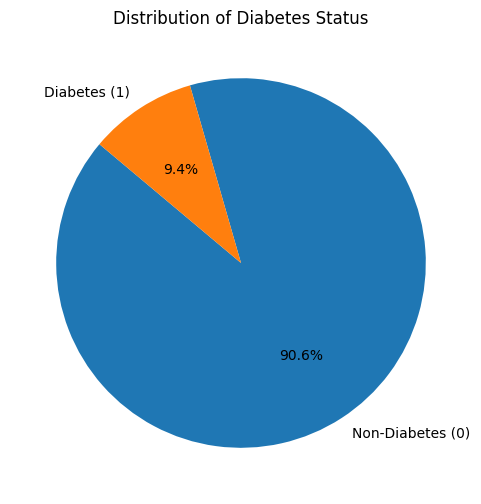

In [71]:
diabetes_counts = df_cleaned["Diabetes"].value_counts()

labels = ['Non-Diabetes (0)', 'Diabetes (1)']

plt.figure(figsize=(6,6))
plt.pie(
    diabetes_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
)
plt.title('Distribution of Diabetes Status')
plt.show()

In [72]:
df_majority = df_cleaned[df_cleaned['Diabetes'] == 0.0]
df_minority = df_cleaned[df_cleaned['Diabetes'] == 1.0]

df_majority_undersampled = resample(
    df_majority,
    replace=False,  
    n_samples=len(df_minority),
    random_state=42
)

df_cleaned = pd.concat([df_majority_undersampled, df_minority], ignore_index=True)
print(df_cleaned['Diabetes'].value_counts())

Diabetes
0.0    1304
1.0    1304
Name: count, dtype: int64


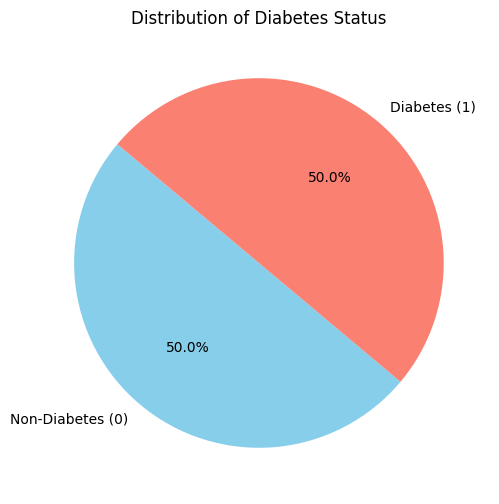

In [73]:
diabetes_counts = df_cleaned["Diabetes"].value_counts()

labels = ['Non-Diabetes (0)', 'Diabetes (1)']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(
    diabetes_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors 
)
plt.title('Distribution of Diabetes Status')
plt.show()

In [74]:
df_diabetes_1 = df_cleaned[df_cleaned["Diabetes"] == 1]
print(df_diabetes_1.isnull().sum())

Age                 0
Gender              0
BMI                 0
SBP                 0
DBP                 0
FPG                 0
Chol               14
Tri                14
HDL               412
LDL               395
ALT                 9
AST               762
BUN                96
CCR                34
FFPG               19
smoking           889
drinking          889
family_history      0
Diabetes            0
dtype: int64


In [75]:
df_diabetes_1 = df_cleaned[df_cleaned['Diabetes'] == 1.0].copy()  
num_cols = ["Age", "BMI", "SBP", "DBP", "FPG", "Chol", "Tri", "HDL", "LDL", "ALT", "AST", "BUN", "CCR", "FFPG"]
for col in num_cols:
    median_value = df_diabetes_1[col].median()
    df_diabetes_1[col] = df_diabetes_1[col].fillna(median_value)

cat_cols = ["smoking", "drinking"]
for col in cat_cols:
    mode_value = df_diabetes_1[col].mode()[0]
    df_diabetes_1[col] = df_diabetes_1[col].fillna(mode_value)


df_cleaned.loc[df_cleaned['Diabetes'] == 1.0, num_cols] = df_diabetes_1[num_cols].values
df_cleaned.loc[df_cleaned['Diabetes'] == 1.0, cat_cols] = df_diabetes_1[cat_cols].values

print(df_cleaned['Diabetes'].value_counts())
print(df_cleaned.isnull().sum())

Diabetes
0.0    1304
1.0    1304
Name: count, dtype: int64
Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
AST               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_history    0
Diabetes          0
dtype: int64


In [76]:
df_cleaned.to_csv('dataset_cleaned.csv', index=False)